First import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import linregress
import numpy as np

I have found some data on climate change from the kaggle site
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
There are 3 data files
+ GlobalTemperature.csv
+ GlobalLandTemperaturesByMajorCity.csv
+ GlobalLandTemperaturesByCountry.csv

First look at GlobalTemperature.csv

In [151]:
climatedata = pd.read_csv('GlobalTemperatures.csv')

In [5]:
climatedata.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
climatedata.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [237]:
climatedata.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [68]:
climatedata.drop(climatedata.columns[2:], axis=1, inplace=True)

In [332]:
len(climatedata['dt'].unique())

3192

Make a scatter plot with the global temperature data

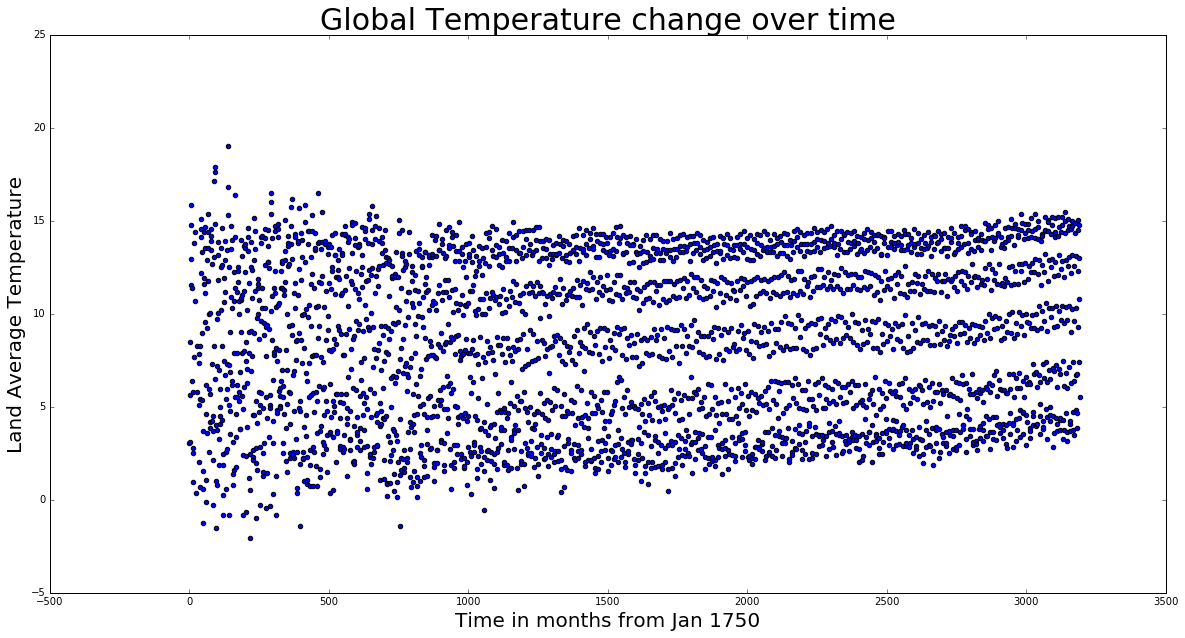

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(climatedata.index, climatedata['LandAverageTemperature'])
#plt.scatter(climatedata.index, climatedata['LandAndOceanAverageTemperature'], color = 'r')
plt.xlabel('Time in months from Jan 1750', size=20)
plt.ylabel('Land Average Temperature', size=20)
plt.title('Global Temperature change over time',size=30)

The data looks quite messy, because it plots all the months together, We probably want to plot each month by itself

In [70]:
climate_by_month = pd.DataFrame({
    'years':np.arange(1750,2016,1),
    'Jan':climatedata[climatedata['dt'].str.contains(r'-01-')]['LandAverageTemperature'],
})

climate_by_month.head()

,Jan,years
0,3.034,1750
12,2.495,1751
24,0.348,1752
36,2.039,1753
48,1.574,1754


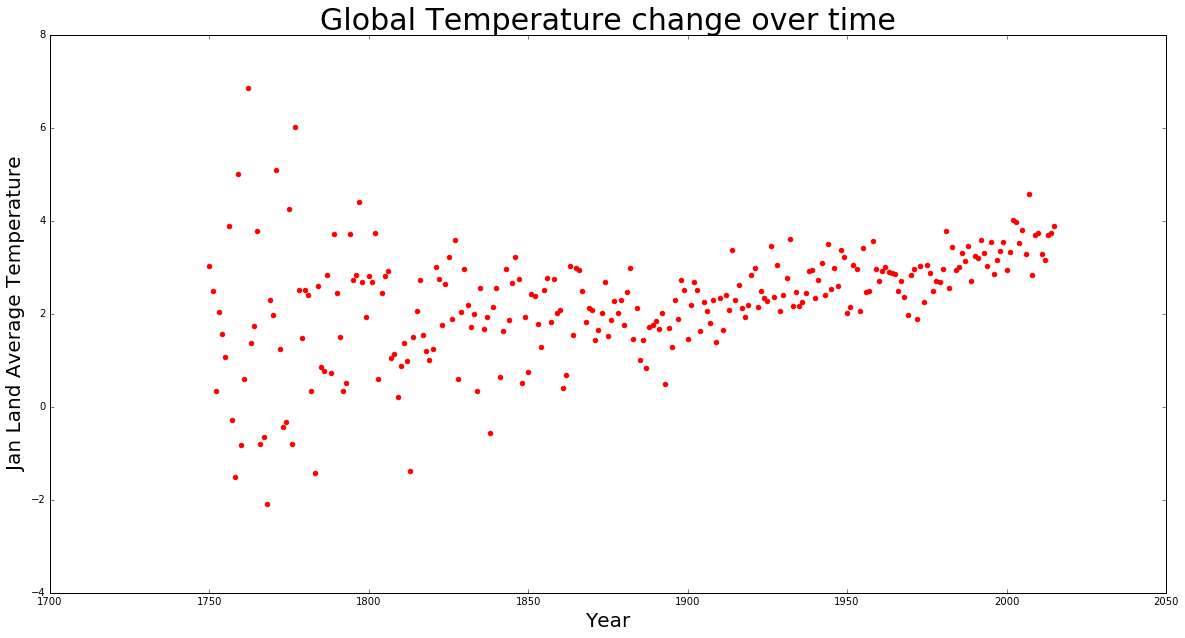

In [71]:
plt.figure(figsize=(20,10))
plt.scatter(climate_by_month['years'], climate_by_month['Jan'],color='r', label = 'Land')
plt.xlabel('Year', size=20)
plt.ylabel('Jan Land Average Temperature', size=20)
plt.title('Global Temperature change over time',size=30)

This looks better, will do for all months

In [72]:
climate_by_month['Feb'] = climatedata[climatedata['dt'].str.contains('-02-')]['LandAverageTemperature'].values
climate_by_month['Mar'] = climatedata[climatedata['dt'].str.contains('-03-')]['LandAverageTemperature'].values
climate_by_month['Apr'] = climatedata[climatedata['dt'].str.contains('-04-')]['LandAverageTemperature'].values
climate_by_month['May'] = climatedata[climatedata['dt'].str.contains('-05-')]['LandAverageTemperature'].values
climate_by_month['Jun'] = climatedata[climatedata['dt'].str.contains('-06-')]['LandAverageTemperature'].values
climate_by_month['Jul'] = climatedata[climatedata['dt'].str.contains('-07-')]['LandAverageTemperature'].values
climate_by_month['Aug'] = climatedata[climatedata['dt'].str.contains('-08-')]['LandAverageTemperature'].values
climate_by_month['Sep'] = climatedata[climatedata['dt'].str.contains('-09-')]['LandAverageTemperature'].values
climate_by_month['Oct'] = climatedata[climatedata['dt'].str.contains('-10-')]['LandAverageTemperature'].values
climate_by_month['Nov'] = climatedata[climatedata['dt'].str.contains('-11-')]['LandAverageTemperature'].values
climate_by_month['Dec'] = climatedata[climatedata['dt'].str.contains('-12-')]['LandAverageTemperature'].values

Let's just plot a few months where the temperatures are quite different

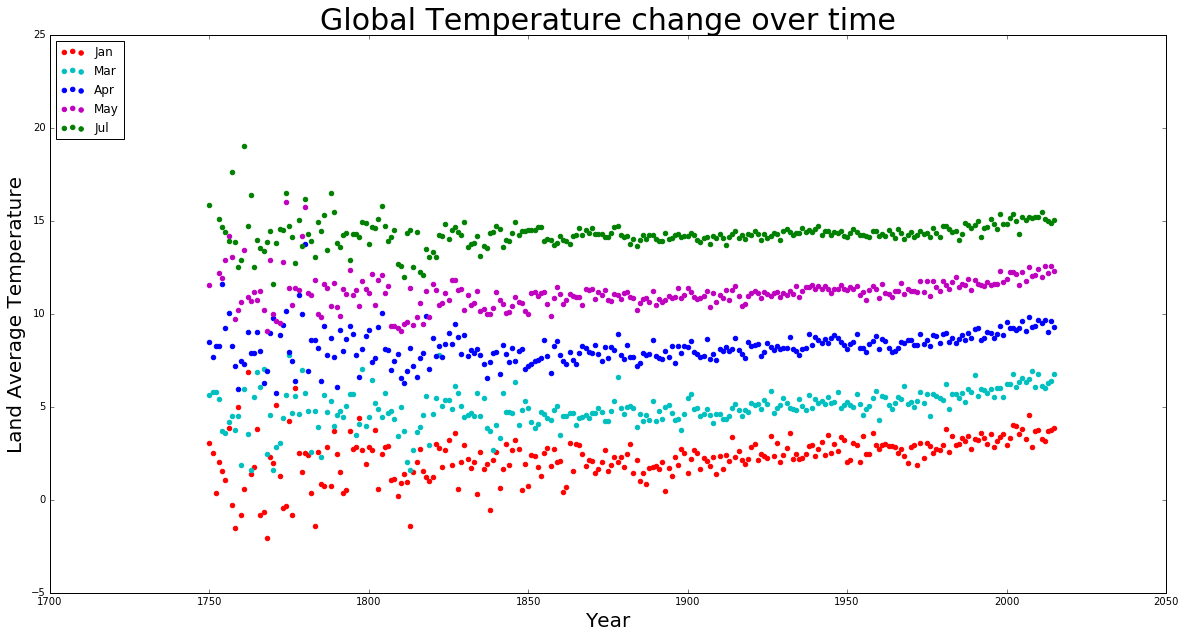

In [73]:
plt.figure(figsize=(20,10))
plt.scatter(climate_by_month['years'], climate_by_month['Jan'],color='r', label = 'Jan')
plt.scatter(climate_by_month['years'], climate_by_month['Mar'],color='c', label = 'Mar')
plt.scatter(climate_by_month['years'], climate_by_month['Apr'],color='b', label = 'Apr')
plt.scatter(climate_by_month['years'], climate_by_month['May'],color='m', label = 'May')
plt.scatter(climate_by_month['years'], climate_by_month['Jul'],color='g', label = 'Jul')
plt.xlabel('Year', size=20)
plt.ylabel('Land Average Temperature', size=20)
plt.title('Global Temperature change over time',size=30)
plt.legend(loc='upper left')

From the graph we see a trend of temperatures going up, although the change is quite small, let's calculate the average and add to another column

In [74]:
climate_by_month['mean'] = (climate_by_month['Jan'] + climate_by_month['Feb'] + climate_by_month['Mar'] +
climate_by_month['Apr'] + climate_by_month['May'] + climate_by_month['Jun'] +climate_by_month['Jul'] +
climate_by_month['Aug'] + climate_by_month['Sep'] + climate_by_month['Oct'] +climate_by_month['Nov'] +
climate_by_month['Dec']) / 12

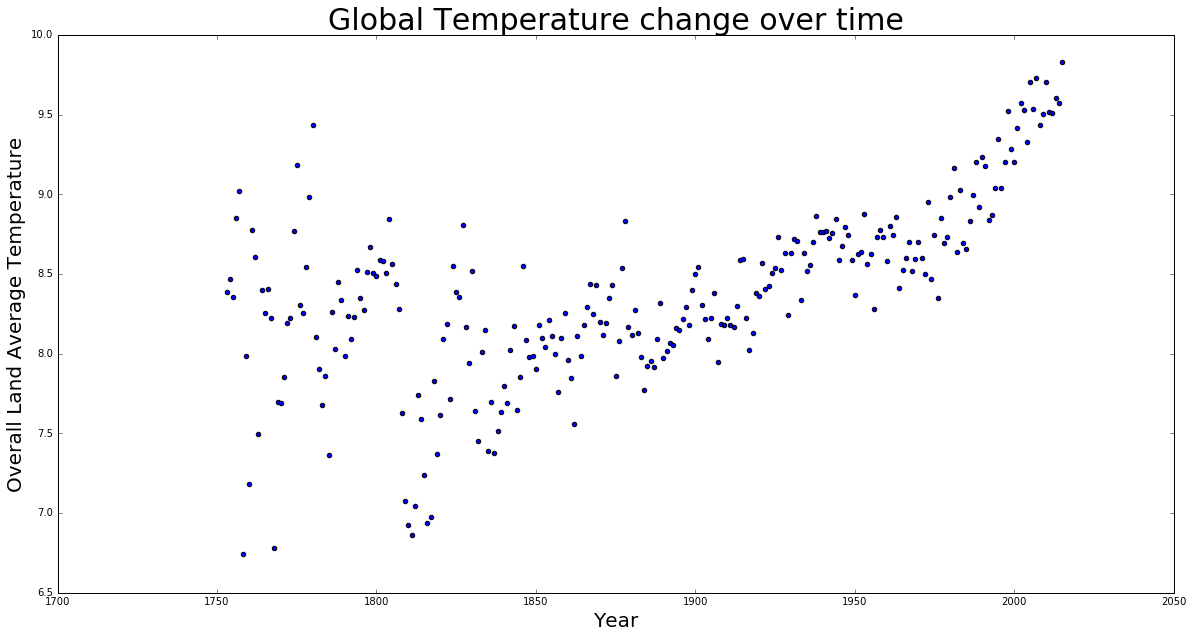

In [75]:
plt.figure(figsize=(20,10))
plt.scatter(climate_by_month['years'], climate_by_month['mean'])
plt.xlabel('Year', size=20)
plt.ylabel('Overall Land Average Temperature', size=20)
plt.title('Global Temperature change over time',size=30)

Let's try to fit a line through it

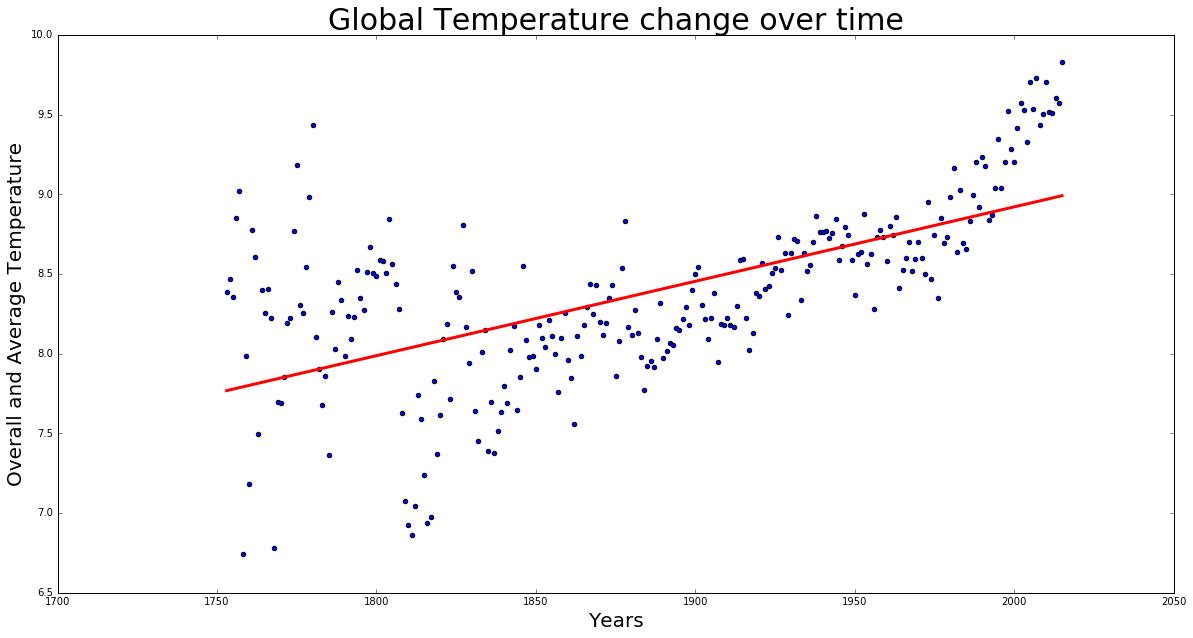

In [76]:
plt.figure(figsize=(20,10))
plt.scatter(climate_by_month['years'], climate_by_month['mean'])
plt.xlabel('Years', size=20)
plt.ylabel('Overall and Average Temperature', size=20)
plt.title('Global Temperature change over time',size=30)
slope, intercept, r_value, p_value, std_err = linregress(climate_by_month[climate_by_month['mean'].notnull()]['years'],climate_by_month[climate_by_month['mean'].notnull()]['mean'])
line = [slope*xi + intercept for xi in climate_by_month[climate_by_month['mean'].notnull()]['years']]
plt.plot(climate_by_month[climate_by_month['mean'].notnull()]['years'],line,'r-', linewidth=3)

Next read in the second file

In [152]:
climatedata_by_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [79]:
climatedata_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [80]:
climatedata_by_city.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


Check how many cities are in the data

In [81]:
len(climatedata_by_city['City'].unique())

100

Pivot the table so we get all the countries as columns

In [82]:
climatedata_city = climatedata_by_city.pivot(index = 'dt',columns='City',values='AverageTemperature')
climatedata_city.head()

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
dt,,,,,,,,,,,,,,,,,,,,,
1743-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.106,NaN,NaN,NaN
1743-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
climatedata_city.reset_index(inplace=True)

In [428]:
climatedata_city.tail()

City,dt,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
3234,2013-05-01,27.652,19.774,33.856,22.917,23.647,17.464,28.673,29.189,30.927,...,18.317,24.518,18.111,21.542,22.102,16.757,13.818,35.285,23.173,18.979
3235,2013-06-01,26.157,18.736,31.099,27.292,25.329,20.104,33.803,25.835,28.771,...,18.124,27.351,21.139,24.151,24.366,20.927,17.367,34.516,26.817,23.522
3236,2013-07-01,24.951,18.148,28.073,29.850,26.369,21.948,36.392,25.008,28.155,...,16.849,28.641,22.408,25.497,27.056,24.645,20.460,31.496,31.171,25.251
3237,2013-08-01,24.541,19.005,27.512,29.704,27.453,22.625,35.463,25.236,28.351,...,18.215,28.805,21.991,25.413,27.054,26.364,18.520,31.159,31.050,24.528
3238,2013-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.599,NaN,NaN,NaN


Get rid of NA lines

In [84]:
climate_city_dropna = climatedata_city.dropna(how='any')

In [85]:
climate_city_dropna.reset_index(drop=True,inplace=True)

In [431]:
len(climate_city_dropna)

1470

Add years column by extracting first 4 digit from dt column, we will use yearly average temperature instead of each month

In [86]:
climate_city_dropna['years'] = [x[0:4] for x in climate_city_dropna['dt']]

/home/lei/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Group by years to get avereage

In [87]:
climate_city_mean = climate_city_dropna.groupby('years').mean()

In [88]:
climate_city_mean.reset_index(inplace=True)

In [435]:
climate_city_mean.head()

City,years,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,1891,25.109083,17.182167,26.318500,17.206333,20.094250,10.067083,22.569583,24.953667,27.128750,...,19.562583,21.828833,8.061167,11.721167,12.002250,12.423167,6.277917,29.022500,16.713750,11.423833
1,1892,25.167250,17.049333,26.696167,17.561250,20.422167,10.676750,22.858750,24.592333,26.590500,...,19.171750,21.752833,7.345750,10.985833,11.206750,12.098750,5.399000,28.673000,16.363583,11.035583
2,1893,25.330917,17.008917,25.452917,16.938583,19.662417,9.620833,22.424250,24.384333,26.366417,...,18.491833,21.441917,7.409417,10.883083,10.962833,11.710083,4.829667,28.543417,16.091083,10.950500
3,1894,25.040500,16.983583,26.028250,16.478333,19.987750,9.544917,21.631250,24.749500,26.679167,...,19.479750,22.003000,8.188167,11.847417,12.134750,12.923500,6.642167,28.422167,16.743583,11.439833
4,1895,25.371167,17.155250,26.497167,17.075833,20.141500,10.406500,22.046667,24.783250,27.047667,...,19.433750,21.622667,7.183333,10.695000,10.861833,12.224583,5.124667,28.521667,16.254500,10.831083


Now we can plot bar graph to see change in temperature for each city

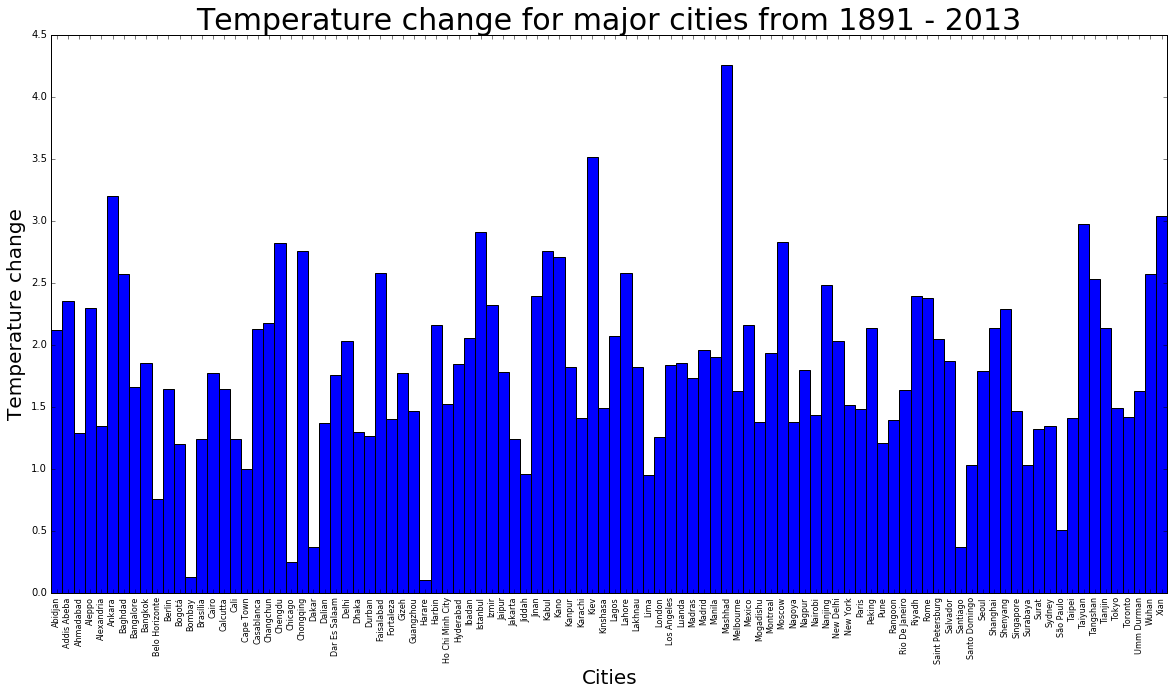

In [89]:
ind = np.arange(0,100,1)
barlabels = climate_city_mean.columns[1:]
plt.figure(figsize=(20,10))
plt.bar(ind, climate_city_mean[climate_city_mean['years'] == '2013'].values[0][1:] - climate_city_mean[climate_city_mean['years'] == '1891'].values[0][1:], 1, color="blue")
plt.ylabel('Temperature change', size=20)
plt.xticks(ind + 0.5, barlabels, size=8,rotation = 90)
plt.xlabel('Cities', size=20)
plt.title('Temperature change for major cities from 1891 - 2013',size=30)

The city with highest change in temperature is Mashhad

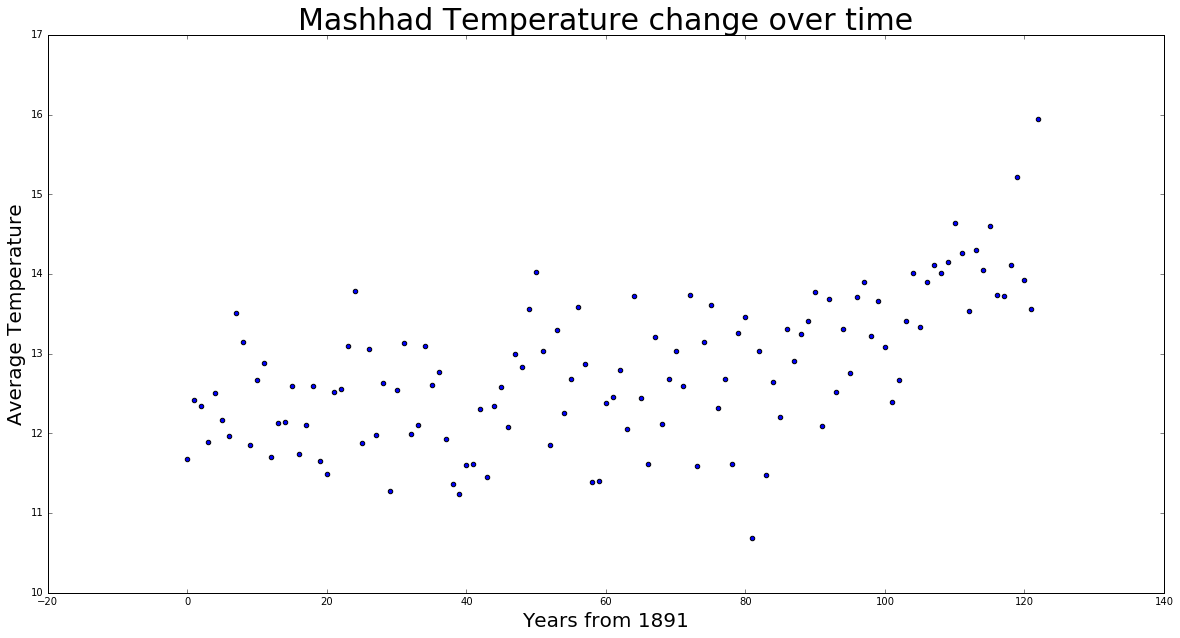

In [90]:
plt.figure(figsize=(20,10))
plt.scatter(climate_city_mean.index, climate_city_mean['Mashhad'])
plt.xlabel('Years from 1891', size=20)
plt.ylabel('Average Temperature', size=20)
plt.title('Mashhad Temperature change over time',size=30)

The lowest is Harare

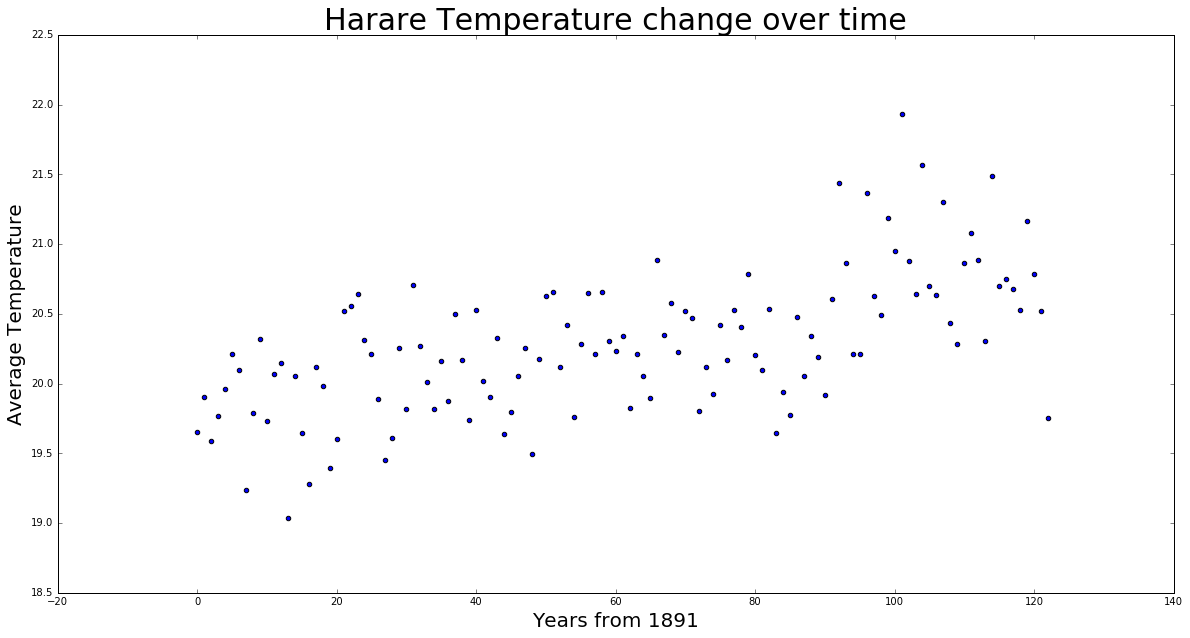

In [91]:
plt.figure(figsize=(20,10))
plt.scatter(climate_city_mean.index, climate_city_mean['Harare'])
plt.xlabel('Years from 1891', size=20)
plt.ylabel('Average Temperature', size=20)
plt.title('Harare Temperature change over time',size=30)

Looking at the above graph we see the trend is definitely going up, however there is an outlier for 2013 where the temperature has dropped, we probably should average the temperatures to avoid such outliers, let's do this for 5 years on each end

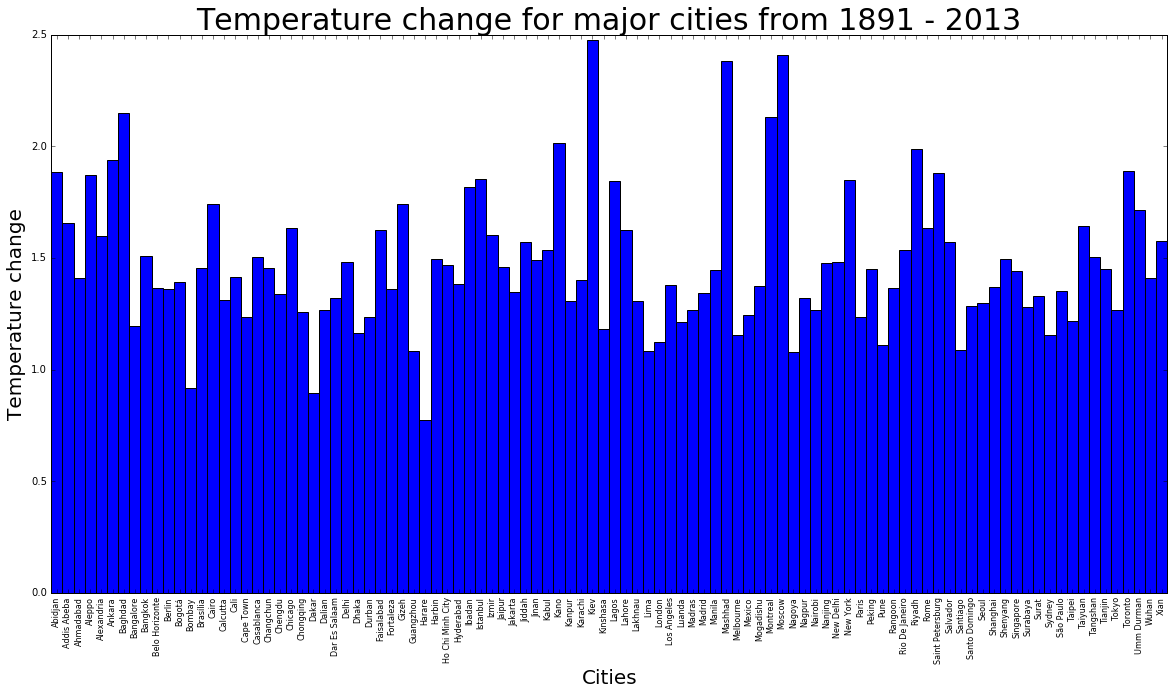

In [92]:
ind = np.arange(0,100,1)
barlabels = climate_city_mean.columns[1:]
plt.figure(figsize=(20,10))
plt.bar(ind, 
        (climate_city_mean[climate_city_mean['years'] == '2013'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2012'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2011'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2010'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2009'].values[0][1:]) / 5 - (climate_city_mean[climate_city_mean['years'] == '1891'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1892'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1893'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1894'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1895'].values[0][1:]) / 5 , 1, color="blue")
plt.ylabel('Temperature change', size=20)
plt.xticks(ind + 0.5, barlabels, size=8,rotation = 90)
plt.xlabel('Cities', size=20)
plt.title('Temperature change for major cities from 1891 - 2013',size=30)

This looks better, all the cities are quite similar in temperature changes

It is difficult to see the cities this way, let's plot them on a world map using a package called basemap Followingn this tutorial and use some of the code to generate the world map http://maxberggren.se/2015/08/04/basemap/

In [1]:
from mpl_toolkits.basemap import Basemap

In [94]:
m = Basemap(projection='kav7',resolution='c',lat_0=0., lon_0=0.)#,llcrnrlat=-60,llcrnrlon=-180,urcrnrlat=90,urcrnrlon=180)

In [95]:
n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

Get longitude and latitude included in the data file

In [96]:
lons = []
lats = []
for i in barlabels:
    lons.append(list(climatedata_by_city[climatedata_by_city['City'] == i]['Longitude'])[0])
    lats.append(list(climatedata_by_city[climatedata_by_city['City'] == i]['Latitude'])[0])

Unfortunately the longitude and latitude are in a different format than what can be accepted in basemap package, so we need to convert the data first to numbers only

In [97]:
for i in range(len(lons)):
    if 'W' in lons[i]:
        lons[i] = float('-' + lons[i].replace('W',''))
    elif 'E' in lons[i]:
        lons[i] = float(lons[i].replace('E',''))
for i in range(len(lats)):
    if 'S' in lats[i]:
        lats[i] = float('-' + lats[i].replace('S',''))
    elif 'N' in lats[i]:
        lats[i] = float(lats[i].replace('N',''))

Get the averaged temperature changes 

In [98]:
tempchange = (climate_city_mean[climate_city_mean['years'] == '2013'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2012'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2011'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2010'].values[0][1:] +
              climate_city_mean[climate_city_mean['years'] == '2009'].values[0][1:]
             ) / 5 - (climate_city_mean[climate_city_mean['years'] == '1891'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1892'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1893'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1894'].values[0][1:] +
               climate_city_mean[climate_city_mean['years'] == '1895'].values[0][1:]) / 5
x, y = m(lons, lats) # Convert coords to projected place in figure

The size of the circles represent the size of the temperature change. Hover the muse over a city to see its name, the mouse over event handling code came from stackoverflow, thanks to Pelson
https://stackoverflow.com/questions/11537374/matplotlib-basemap-popup-box

<IPython.core.display.Javascript object>


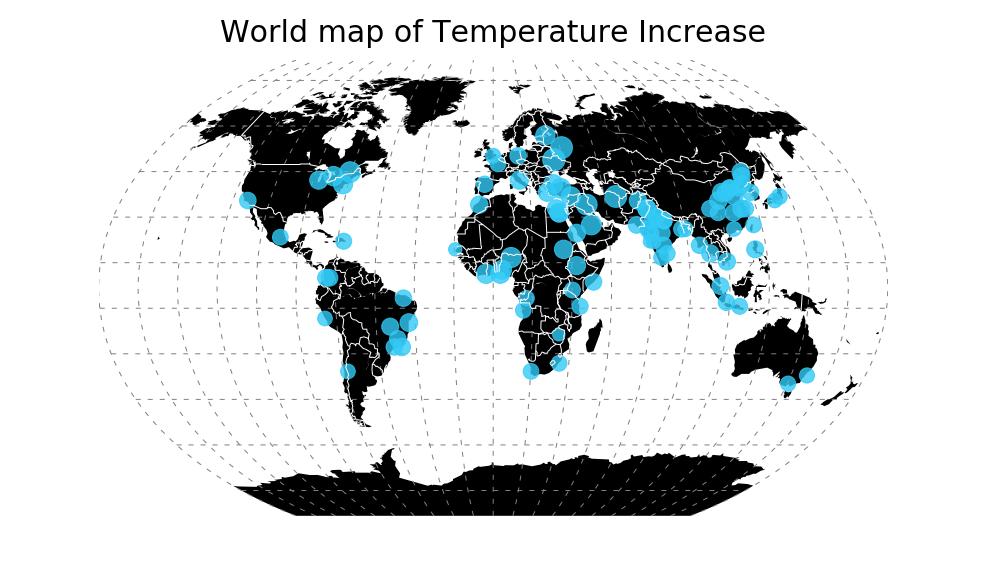

In [100]:
%matplotlib notebook
fig1 = plt.figure(figsize=(13.7,8))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', 
                 lake_color='white')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)
#labels = list(climate_city_mean.columns[1:])

title = plt.title('World map of Temperature Increase', 
                  fontsize=30) 
title.set_y(1.03) # Move the title a bit for niceness
m.scatter(x,y,s = [x * 200 for x in tempchange],
         marker="o",
         color='#32caf6',
         zorder=10,
         alpha=0.8)
points_with_annotation = []
for i in range(len(x) - 1):
    point, = plt.plot(x[i],y[i],'o',markersize=0)
    annotation = ax.annotate(climate_city_mean.columns[1 + i], xy=(x[i], y[i]),
                xytext=(x[i]+1, y[i]+1),
            bbox=dict(boxstyle="round4", fc="w", alpha = 1),
            arrowprops=dict(facecolor='yellow'),
            zorder = 20,
    )
    annotation.set_visible(False)

    points_with_annotation.append([point, annotation])


def on_move(event):
    visibility_changed = False
    for point, annotation in points_with_annotation:
        should_be_visible = (point.contains(event)[0] == True)

        if should_be_visible != annotation.get_visible():
            visibility_changed = True
            annotation.set_visible(should_be_visible)
    print(visibility_changed)
    if visibility_changed:        
        plt.draw()

on_move_id = fig1.canvas.mpl_connect('motion_notify_event', on_move)

Finally I wanted to see if the temperature increase is related to population desntiy and CO2 emission. I found 2 extra files
+ https://data.worldbank.org/indicator/EN.ATM.CO2E.PC for API_EN.ATM.CO2E.PC_DS2_en_csv_v2.csv'
+ https://data.worldbank.org/indicator/EN.POP.DNST for API_EN.POP.DNST_DS2_en_csv_v2.csv

Fortunately the 2 files have same format, I deleted the first couple of lines in each file in excel as it was loading in pandas with errors. Then load the files

In [127]:
worldco2 = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2.csv')
worldpop = pd.read_csv('API_EN.POP.DNST_DS2_en_csv_v2.csv')
worldpop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.972222,312.366667,314.983333,316.827778,318.666667,...,562.322222,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111,NaN
1,Andorra,AND,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.587234,32.714894,34.914894,37.170213,39.470213,...,180.591489,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553,NaN
2,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.038148,14.312061,14.599692,14.901579,15.218206,...,39.637202,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649,NaN
3,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.305195,4.384299,4.464433,4.544558,4.624228,...,15.387749,15.915819,16.459536,17.020898,17.600302,18.196544,18.808215,19.433323,20.070565,NaN
4,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,...,108.394781,107.566204,106.843759,106.314635,106.013869,105.848431,105.717226,105.607810,105.444051,NaN


In [362]:
len(worldpop)

264

Drop unnecessary columns

In [128]:
worldco2.drop(['Country Code','Indicator Name','Indicator Code'], 1,inplace=True)
worldpop.drop(['Country Code','Indicator Name','Indicator Code'], 1,inplace=True)

In [137]:
worldpop.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,NaN,307.972222,312.366667,314.983333,316.827778,318.666667,320.622222,322.494444,324.361111,...,562.322222,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111,NaN
1,Andorra,NaN,30.587234,32.714894,34.914894,37.170213,39.470213,41.800000,44.159574,46.570213,...,180.591489,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553,NaN
2,Afghanistan,NaN,14.038148,14.312061,14.599692,14.901579,15.218206,15.545203,15.881812,16.235931,...,39.637202,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649,NaN
3,Angola,NaN,4.305195,4.384299,4.464433,4.544558,4.624228,4.703271,4.782892,4.865721,...,15.387749,15.915819,16.459536,17.020898,17.600302,18.196544,18.808215,19.433323,20.070565,NaN
4,Albania,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,71.737153,73.805547,...,108.394781,107.566204,106.843759,106.314635,106.013869,105.848431,105.717226,105.607810,105.444051,NaN


put years into rows using melt

In [129]:
worldpop = worldpop.melt(id_vars = 'Country Name')
worldco2 = worldco2.melt(id_vars = 'Country Name')
worldpop.rename(columns = {'variable':'years'}, inplace=True)
worldco2.rename(columns = {'variable':'years'}, inplace=True)

In [130]:
worldpop.tail()

,Country Name,years,value
15043,"Yemen, Rep.",2016,NaN
15044,South Africa,2016,NaN
15045,"Congo, Dem. Rep.",2016,NaN
15046,Zambia,2016,NaN
15047,Zimbabwe,2016,NaN


Next we can plot some graphs to see relationships between Population Density, CO2 Emission and year for Australia

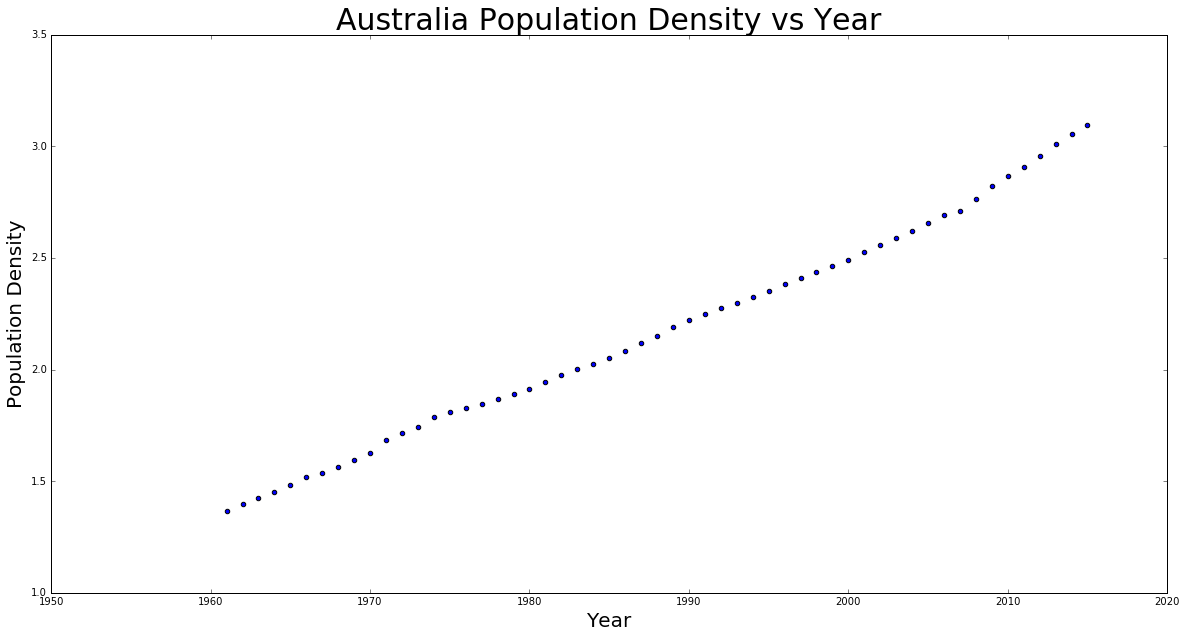

In [131]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(np.arange(1960,2017,1), worldpop['value'][worldpop['Country Name'] == 'Australia'])
plt.xlabel('Year', size=20)
plt.ylabel('Population Density', size=20)
plt.title('Australia Population Density vs Year',size=30)

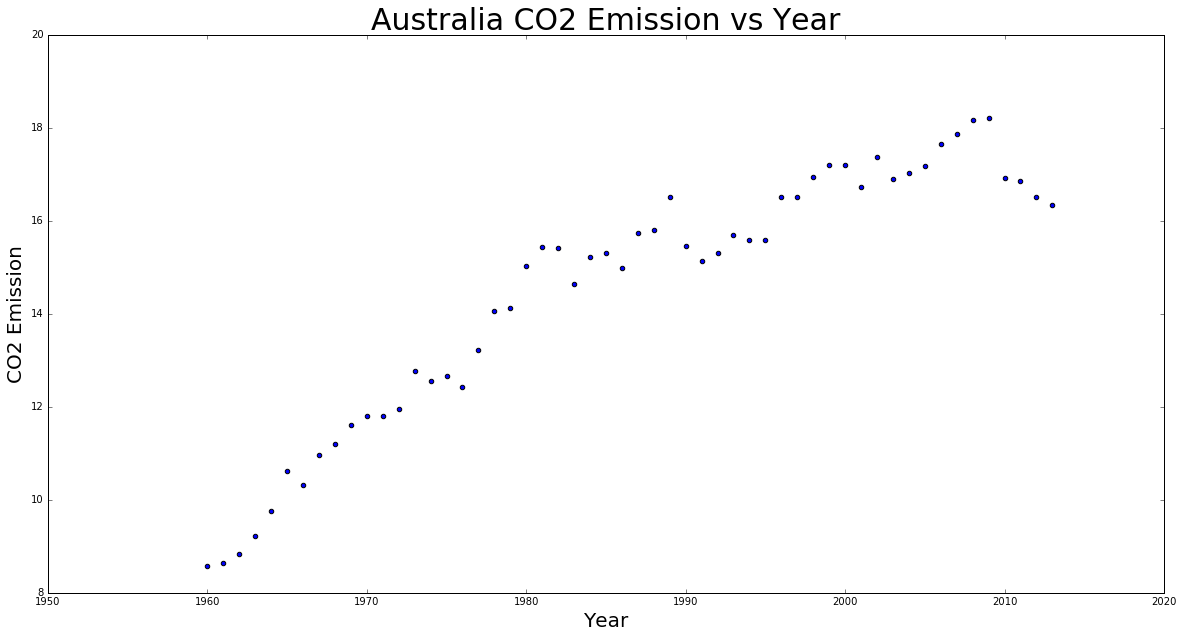

In [132]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(1960,2017,1), worldco2['value'][worldpop['Country Name'] == 'Australia'])
plt.xlabel('Year', size=20)
plt.ylabel('CO2 Emission', size=20)
plt.title('Australia CO2 Emission vs Year',size=30)

In [133]:
merged = worldpop.merge(worldco2, how = 'inner',on = ['Country Name','years'])

In [134]:
merged.columns = ['Country Name','years','Population Density','CO2 Emission']

In [135]:
merged.head()

,Country Name,years,Population Density,CO2 Emission
0,Aruba,1960,NaN,NaN
1,Andorra,1960,NaN,NaN
2,Afghanistan,1960,NaN,0.046060
3,Angola,1960,NaN,0.097472
4,Albania,1960,NaN,1.258195


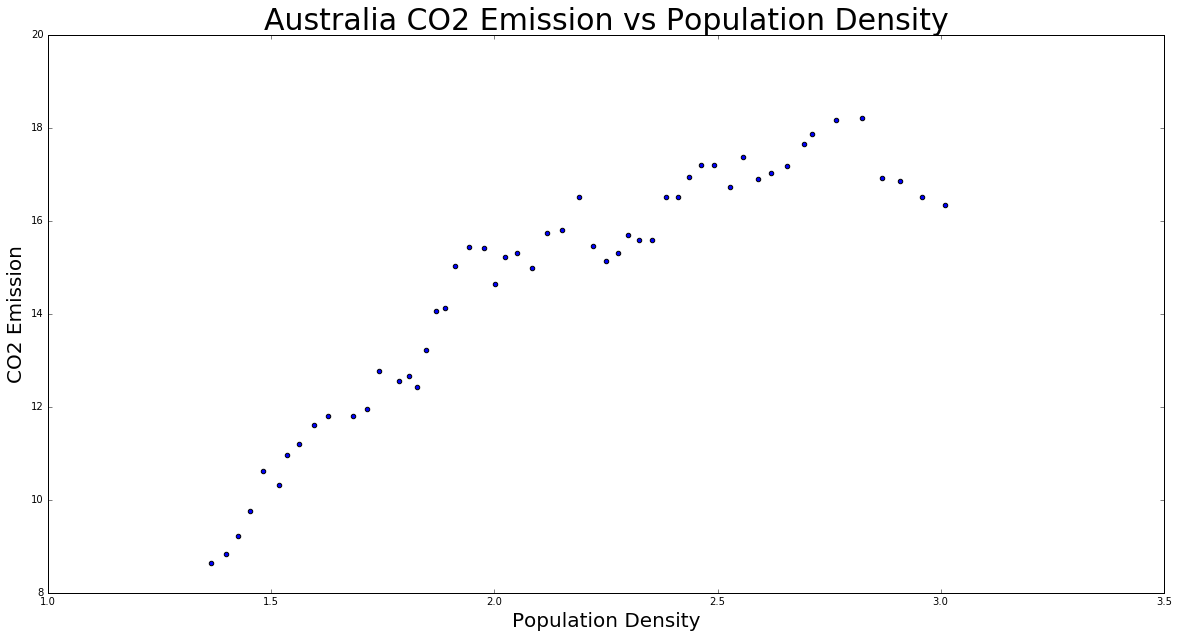

In [136]:
plt.figure(figsize=(20,10))
plt.scatter(merged[merged['Country Name'] == 'Australia']['Population Density'], merged[merged['Country Name'] == 'Australia']['CO2 Emission'])
plt.xlabel('Population Density', size=20)
plt.ylabel('CO2 Emission', size=20)
plt.title('Australia CO2 Emission vs Population Density',size=30)

Load country temperature data and perform the same process as the city data file

In [153]:
climatedata_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
climatedata_country = climatedata_by_country.pivot(index = 'dt',columns='Country',values='AverageTemperature')
climatedata_country.reset_index(inplace=True)
climatedata_country.head()

Country,dt,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
0,1743-11-01,NaN,NaN,8.62,NaN,NaN,7.556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.384
1,1743-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
climatedata_country['Antarctica'].unique()

array([ nan])

Nothing for Antactica so drop Antarctica and other NA rows

In [139]:
climatedata_country = climatedata_country.drop('Antarctica',1)
climate_country_dropna = climatedata_country.dropna(how='any')
climate_country_dropna.reset_index(drop=True,inplace=True)

Add year column and get mean for each year

In [140]:
climate_country_dropna['years'] = [x[0:4] for x in climate_country_dropna['dt']]
climate_country_mean = climate_country_dropna.groupby('years').mean()
climate_country_mean.head()

/home/lei/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
years,,,,,,,,,,,,,,,,,,,,,
1948,16.806200,24.593800,14.380300,25.188800,26.657600,13.208200,21.681700,27.099400,26.836400,13.370500,...,15.794600,15.662900,25.250400,24.770800,26.878300,23.700100,27.526600,20.973200,20.517200,7.367700
1949,15.903500,24.744700,13.999300,25.144900,26.857100,13.779000,21.711300,26.758300,26.546200,13.502700,...,16.097000,13.968100,25.108500,24.954500,26.517600,23.600000,27.301000,21.426800,20.961300,8.183100
1950,14.233636,24.152273,14.945455,23.816091,26.513545,12.553545,21.484818,26.496182,26.267818,14.195364,...,16.870455,12.615273,24.881545,24.229091,26.220000,23.103636,26.313636,20.749636,21.052273,7.009636
1951,13.967750,24.128333,13.569833,23.321667,26.689667,10.972917,22.002167,26.695250,26.537750,14.836917,...,17.339250,11.909083,25.358667,23.863667,26.432583,21.958833,26.388083,21.294167,21.102333,5.820583
1952,14.175417,24.275917,13.573917,23.185417,27.063750,11.660833,22.187667,26.866917,26.714250,14.916333,...,17.530667,12.312417,25.560667,24.186833,26.609083,22.330167,26.081667,21.522750,21.325500,4.795000


Now we got yearly average we can melt the countries to rows again

In [141]:
len(climate_country_mean)

66

In [142]:
climate_country_mean.reset_index(inplace=True)

In [143]:
climate_new= climate_country_mean.melt(id_vars = 'years')
climate_new.rename(columns = {'Country':'Country Name'},inplace = True)
climate_new.head()

,years,Country Name,value
0,1948,Afghanistan,16.806200
1,1949,Afghanistan,15.903500
2,1950,Afghanistan,14.233636
3,1951,Afghanistan,13.967750
4,1952,Afghanistan,14.175417


Plot Australia temperature change over time

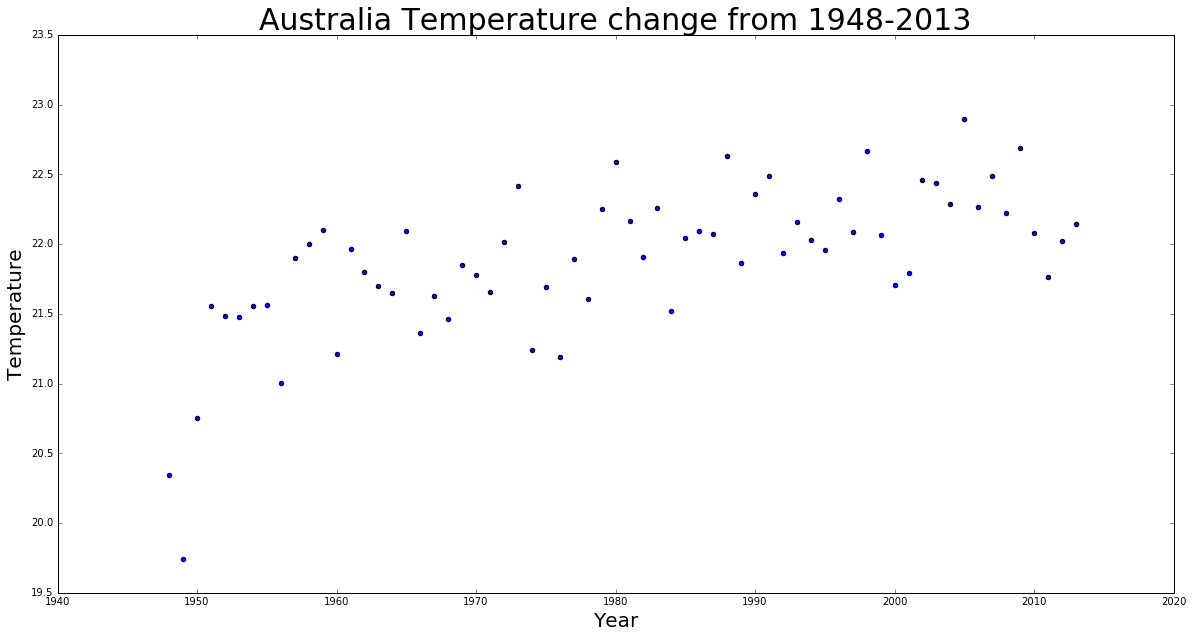

In [144]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(1948,2014,1), climate_new[climate_new['Country Name'] == 'Australia']['value'])
plt.xlabel('Year', size=20)
plt.ylabel('Temperature', size=20)
plt.title('Australia Temperature change from 1948-2013',size=30)

Concatenate this data onto the merged data

In [145]:
new_merged = merged.merge(climate_new,how='inner',on = ['Country Name','years'])

In [146]:
new_merged.columns = ['Country Name','years','Population Density','CO2 Emission','Temperature']

In [147]:
new_merged.head()

,Country Name,years,Population Density,CO2 Emission,Temperature
0,Aruba,1960,NaN,NaN,28.253583
1,Andorra,1960,NaN,NaN,11.214000
2,Afghanistan,1960,NaN,0.046060,13.985417
3,Angola,1960,NaN,0.097472,21.927083
4,Albania,1960,NaN,1.258195,13.335083


Have a look at Australia to see what is the relationship between temperature increase and CO2 emission

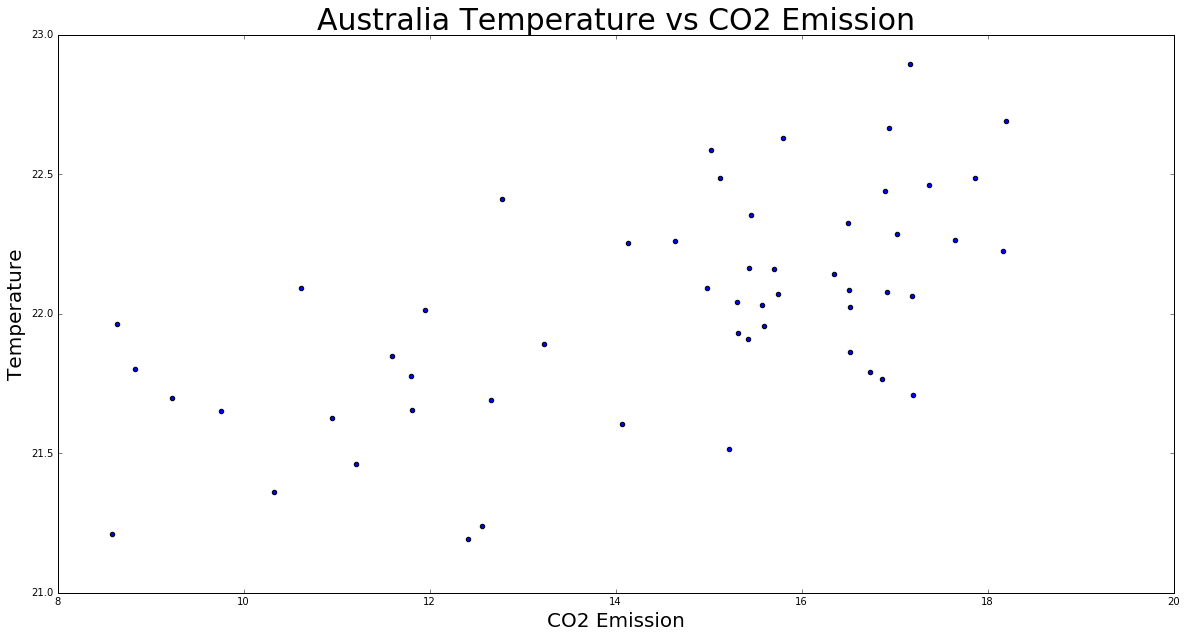

In [148]:
plt.figure(figsize=(20,10))
plt.scatter(new_merged['CO2 Emission'][new_merged['Country Name'] == 'Australia'], new_merged['Temperature'][new_merged['Country Name'] == 'Australia'])
plt.xlabel('CO2 Emission', size=20)
plt.ylabel('Temperature', size=20)
plt.title('Australia Temperature vs CO2 Emission',size=30)

How about temperature change and population density

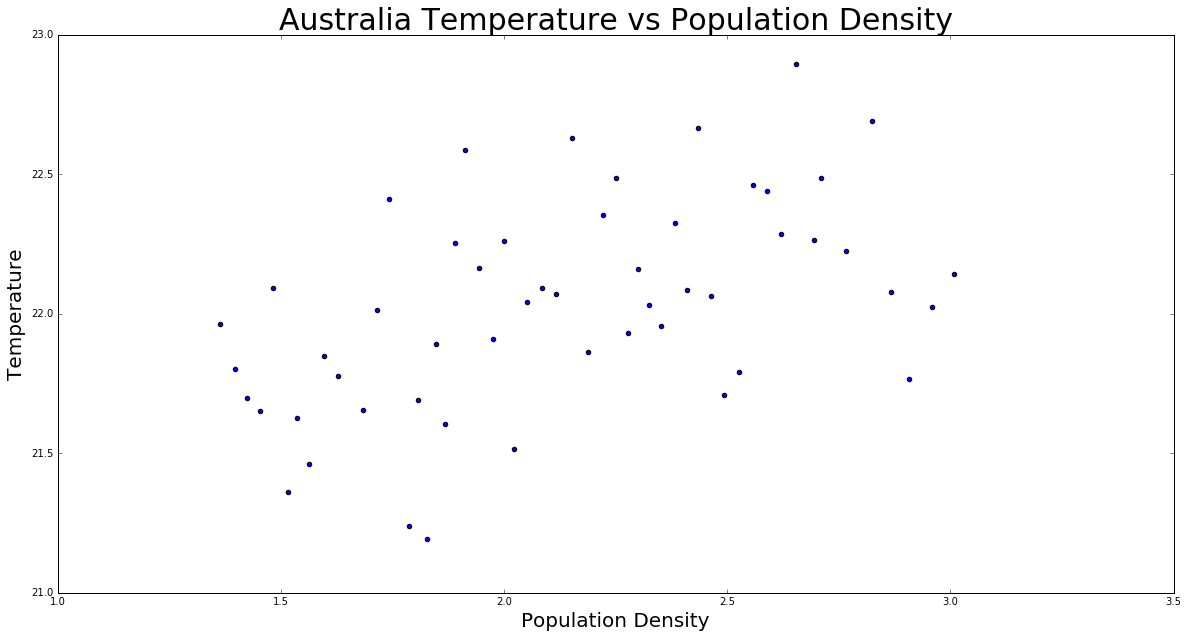

In [149]:
plt.figure(figsize=(20,10))
plt.scatter(new_merged['Population Density'][new_merged['Country Name'] == 'Australia'], new_merged['Temperature'][new_merged['Country Name'] == 'Australia'])
plt.xlabel('Population Density', size=20)
plt.ylabel('Temperature', size=20)
plt.title('Australia Temperature vs Population Density',size=30)

Show all countries in motion chart

In [150]:
mChart = MotionChart(df = new_merged, 
                     key='years', x='CO2 Emission', y='Temperature', 
                     xscale='linear', yscale='linear', size = 'Population Density', color = 'Country Name',
                    category = 'Country Name')

mChart.to_notebook()